# Introduction to Numpy

Numpy is *the* Python library for dealing with large arrays of numbers. Almost all other scientific computing libraries rely on numpy.

## Numpy is faster than Python lists

In [ ]:
import numpy as np
import time

# create a large NumPy array
n = 10000000
a = np.ones(n)

# create a large Python list
b = [1] * n

# time NumPy array addition
start = time.time()
a = a + 1
end = time.time()
numpy_time = end - start
print("Time taken for NumPy array addition:", end - start)

# time Python list addition
start = time.time()
b = [x + 1 for x in b]
end = time.time()
python_time = end - start
print("Time taken for Python list addition:", end - start)
print(f"numpy is {python_time/numpy_time:.01f} times faster.")

Time taken for NumPy array addition: 0.09055471420288086
Time taken for Python list addition: 2.866422414779663
numpy is 31.7 times faster.


## Numpy gives you fine-grained control over array data types

native python only provides int and float, numpy provides [all of these types](https://numpy.org/doc/stable/user/basics.types.html)



In [ ]:
c = np.ones(n).astype('uint8')
start = time.time()
c = c + 1
end = time.time()
numpy_uint_time = end - start
print("Time taken for NumPy uint array addition:", end - start)
print(f"numpy is {python_time/numpy_uint_time:.01f} times faster.")

Time taken for NumPy uint array addition: 0.013688802719116211
numpy is 209.4 times faster.


## Creating Numpy Arrays

https://numpy.org/doc/stable/user/basics.creation.html

In [ ]:
np.array([1,2,3,4,5,6])

In [ ]:
np.zeros(10)

In [ ]:
np.ones(10)

In [ ]:
np.full(shape=10, fill_value=7)

In [ ]:
np.arange(10)

In [ ]:
np.random.randint(100, size=10)

In [ ]:
np.random.normal(size=10)

In [ ]:
np.linspace(start=0, stop=1, num=10)

### Multidimensional arrays

In [ ]:
a = np.zeros((2,3))
a

In [ ]:
len(a)

In [ ]:
a.shape

In [ ]:
a.size

In [ ]:
np.random.normal(size=(2,2))

In [ ]:
a = np.arange(9).reshape(3,3)
a

In [ ]:
for index, row in enumerate(a):
    print(f"row {index}: {row}")

In [ ]:
a.T

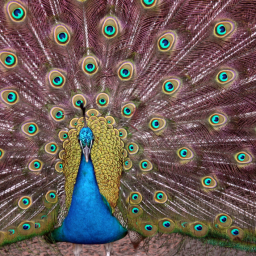

In [ ]:
from PIL import Image
image = Image.open("peacock.png")
image

In [ ]:
image_array = np.array(image)
print(f"Image array shape: {image_array.shape}")
print(f"Image array data type: {image_array.dtype}")
image_array

Image array shape: (256, 256, 3)
Image array data type: uint8


array([[[ 93,  50,  55],
        [106,  67,  65],
        [106,  71,  68],
        ...,
        [124,  76,  70],
        [123,  76,  77],
        [124,  75,  83]],

       [[119,  73,  78],
        [111,  68,  69],
        [ 97,  62,  59],
        ...,
        [ 65,  27,  36],
        [ 55,  20,  30],
        [ 60,  25,  27]],

       [[111,  69,  73],
        [117,  83,  81],
        [105,  70,  67],
        ...,
        [ 93,  53,  52],
        [119,  70,  76],
        [111,  65,  70]],

       ...,

       [[ 99,  79,  73],
        [118,  95,  81],
        [121, 109,  84],
        ...,
        [ 96,  82,  78],
        [ 83,  64,  60],
        [ 79,  66,  60]],

       [[115,  91,  88],
        [107,  79,  77],
        [110,  87,  80],
        ...,
        [ 83,  66,  63],
        [ 85,  71,  68],
        [ 71,  57,  53]],

       [[131,  91,  87],
        [114,  80,  79],
        [103,  79,  72],
        ...,
        [ 82,  69,  65],
        [ 90,  75,  73],
        [ 85,  68,  67]]

## Array Operations

### Arithmetic Operations

In [ ]:
a = np.arange(10)
a

In [ ]:
a*2

In [ ]:
a**2

In [ ]:
b = np.ones(10)
(a**2+b) / 5

In [ ]:
a % 2

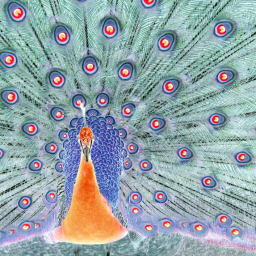

In [ ]:
## QUESTION: What will this operation do to our peacock image?
Image.fromarray(255 - image_array)

### Boolean Operations

In [ ]:
print(a)
print(a == 1)

In [ ]:
# QUESTION: how do we get an array which is True for every even number in a?
# [True, False, True, False, ...]
is_even = None ## How can we do this?
print(a)
print(is_even)

In [ ]:
print(a)
print(b)
print(a > b)

In [ ]:
# Numpy's bitwise boolean operators (&, |, ~, etc.)
# can be used for element-wise boolean operations on True/False arrays
print(f"a greater than 3: {a > 3}")
print(f"a less than 7: {a < 7}")
# Be careful of the order of operations!
print(f"a less than 3 and greater than 7: {(a > 3) & (a < 7)}")

In [ ]:
# Be careful of the order of operations!
a > 3 & a < 7

In [ ]:
# QUESTION: what does this operation do to our image?
Image.fromarray(((image_array > 128)*255).astype('uint8'))

## Array Indexing

[documentation](https://numpy.org/doc/stable/user/basics.indexing.html)

### Python-like array slicing

All the indexing tricks that work with traditional python lists also work with Numpy arrays.

`my_array[start:stop:step]`

In [ ]:
a = np.arange(10)+1
a

In [ ]:
(a[1:5],
 a[:5],
 a[5:],
 a[-2:])

In [ ]:
a[::2], a[::-1]

In [ ]:
a[1:8:3]

### Boolean indexing

We can use an array of True/False values to pick out the elements of the array which correspond to True values.

In [ ]:
a = np.arange(5)+1
print(a)
a[np.array([True, False, False, False, True])]

This is very useful in conjunction with boolean operations over arrays.

In [ ]:
print(a)
print(a < 4)
print(a[a < 4])

In [ ]:
# QUESTION: How could we pick out all the numbers in this array which are divisible by three or five?
x = np.random.randint(100,size=30)
divisible_by_3_or_5 = ...
divisible_by_3_or_5

This also works with multidimensional arrays:

In [ ]:
a = np.arange(12).reshape(3,4)
a

In [ ]:
a[np.array([True, True, False])]

In [ ]:
a[:,np.array([True, True, False, True])]

In [ ]:
print(a)
print(a<6)
print(a[a < 6])

### Indexing using an array of indices

Finally, we can use an array of indices to pick out which elements of the array we want, by their position. This is also allows us to reorder or duplicate elements in the array.

In [ ]:
a = np.arange(10) + 1
a

In [ ]:
a[np.array([1,1,6,5,4,3])]

In [ ]:
a = np.arange(25).reshape(5,5)
a

In [ ]:
# get the diagonal elements of this array
a[np.arange(5), np.arange(5)] # There is also a built-in method for this: np.diag(a)

In [ ]:
a[np.array([0,3,4])]

### Any indexing scheme can be used on the left-hand side of an assignment (equals) statement

In [ ]:
a = np.arange(5)+1
print(a)
a[np.array([True, False, False, False, True])] = -1
print(a)

In [ ]:
a = np.arange(12).reshape(3,4)
print(a)
a[a < 6] *= 10
print(a)

In [ ]:
# QUESTION: How can we write a vectorized form of fizzbuzz using Numpy?
nums = np.arange(100)+1
fizzbuzz = np.array([str(i) for i in nums]) # this is an array of strings
# TODO: replace all elements of fizzbuzz which are divisible by 3 with "fizz"
# TODO: replace all elements of fizzbuzz which are divisible by 5 with "buzz"
# TODO: replace all elements which are divisible by 3 and 5 with "fizzbuzz"
print("\n".join(iter(fizzbuzz)))

## Array Broadcasting

[documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html)

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

1. they are equal, or
2. one of them is 1.

In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(4)

print(a)
print("*")
print(b)
print("=")
print(a * b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
*
[0 1 2 3]
=
[[ 0  1  4  9]
 [ 0  5 12 21]
 [ 0  9 20 33]]


In [ ]:
repeated_b = b[np.newaxis,:].repeat(3, axis=0)
print(a)
print("*")
print(repeated_b)
print("=")
print(a * repeated_b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
*
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
=
[[ 0  1  4  9]
 [ 0  5 12 21]
 [ 0  9 20 33]]


In [ ]:
c = np.arange(3)
print(a)
print('*')
print(c)
print('=')
print(a*c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
*
[0 1 2]
=


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [ ]:
c.shape, c[:,np.newaxis].shape

((3,), (3, 1))

In [ ]:
print(c[:,np.newaxis])
print(a*c[:,np.newaxis])

[[0]
 [1]
 [2]]
[[ 0  0  0  0]
 [ 4  5  6  7]
 [16 18 20 22]]


In [ ]:
repeated_c = c[:,np.newaxis].repeat(4, axis=1)
print(a)
print("*")
print(repeated_c)
print("=")
print(a * repeated_c)

## Aggregation functions (min, max, mean, etc.)

In [ ]:
a = np.arange(12).reshape(3,4) + 1
print(a.shape)
print(a)

In [ ]:
a.min(), a.mean(), a.max(), a.sum(), a.std(), a.var()

In [ ]:
a.argmin(), a.argmax()

In [ ]:
a.flatten()[a.argmin()] == a.min()

In [ ]:
a.sum(axis=0), a.sum(axis=1)

In [ ]:
a.sum(axis=1, keepdims=True)

In [ ]:
a = np.random.randint(100, size=(3,4))
print(a)
# QUESTION: How can we normalize the columns of a,
# so that each column has a mean of 0 and a standard deviation of 1?
a_normalized = ... # TODO
print(f"normalized:\n {a_normalized}")
print(f"column means: {a_normalized.mean(axis=0)}")
print(f"column stds: {a_normalized.std(axis=0)}")

# Numpy Challenge

Complete the following challenges using numpy **without adding any for loops**.

**CHALLENGE 1**: Given an array of N 2D data points of shape (N, 2) and an array of K 2D centroids of shape (K, 2), calculate the distance from each centroid to each data point.

In [ ]:
# Data array, shape (n, 2)
data = np.concatenate([
    np.random.normal(size=(10, 2)),
    np.random.normal(size=(10, 2)) + np.array([2,0]),
    np.random.normal(size=(10, 2)) + np.array([0,2])
])

# centroids array, shape (k, 2)
centroids = np.random.normal(size=(3,2))

# calculate the euclidean distance from each centroid to each data point.
# TODO: compute array of vectors from each centroid to each data point. shape (k, n, 2)
centroids_to_data_points = ...
# TODO: calculate the magnitude of each of these vectors. shape (k, n)
distances = ...
distances

**CHALLENGE 2**: For each data point, get the index of the closest centroid, and then use this to update the centroids according to the K-means algorithm

In [ ]:
# TODO: this should be of shape (len(data)), and values should be integers less than len(centroids)
closest_centroid_indices = ...
new_centroids = []

for centroid_index in range(len(centroids)):
    # TODO: get the data points which are closest to this centroid, and take their average position.
    new_centroid = ...
    new_centroids.append(new_centroid)


# Clustering using Scikit-Learn

In [ ]:
from PIL import Image
from sklearn.cluster import KMeans
import plotly.express as px


# Convert the image to a NumPy array of RGB values. Shape: (width*height, 3)
pixel_values = image_array.reshape(-1,3)
pixel_values_sample =
def rgb_to_hex(rgb):
    r, g, b = rgb
    return f"#{r:02x}{g:02x}{b:02x}"


fig = px.scatter_3d(x=pixel_values[:,0], y=pixel_values[:,1], z=pixel_values[:,2], opacity=0.05, color=[rgb_to_hex(color) for color in pixel_values])
fig.show()

In [ ]:
from PIL import Image
import numpy as np
import plotly.graph_objects as go

# Load the image using OpenCV
image_path = 'peacock.png'
image = Image.open(image_path)

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = np.array(image)

# Extract the pixel values (flatten the image and normalize)
pixels = image_rgb.reshape(-1, 3) / 255

# Randomly sample 10,000 pixels
n_samples = 10000
sample_indices = np.random.choice(pixels.shape[0], n_samples, replace=False)
sampled_pixels = pixels[sample_indices]

# Define x, y, z as the RGB values of the sampled pixels
x, y, z = sampled_pixels[:, 0], sampled_pixels[:, 1], sampled_pixels[:, 2]

# Create the 3D scatter plot
trace = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=2,  # Set the size of the points
        color=sampled_pixels,  # Set the color of the points to their true RGB values
        opacity=0.7,
        showscale=False
    )
)

fig = go.Figure(data=[trace])
fig.show()

In [ ]:
# Use KMeans to cluster the pixel values
from sklearn.cluster import KMeans
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters).fit(pixels)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Replace the pixel values with the cluster centers
new_pixel_values = cluster_centers[labels].reshape(image_rgb.shape)

# Create a new image from the compressed pixel values
new_image = Image.fromarray((new_pixel_values*255).astype('uint8'))

# Save the compressed image to a new PNG file
new_image

In [ ]:
image

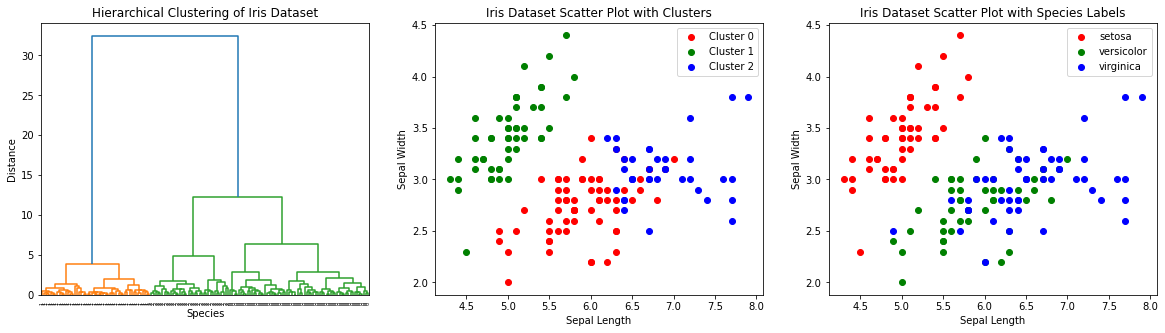

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering
Z = linkage(X, method='ward')
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X)

# Plot the dendrogram
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
dendrogram(Z, labels=model.labels_, ax=ax[0])
ax[0].set_title("Hierarchical Clustering of Iris Dataset")
ax[0].set_xlabel("Species")
ax[0].set_ylabel("Distance")

# Plot the scatter plot colored by the clusters
colors = ['r', 'g', 'b']
for i, c in zip(range(3), colors):
    ax[1].scatter(X[model.labels_ == i, 0], X[model.labels_ == i, 1], c=c, label=f'Cluster {i}')
ax[1].set_xlabel("Sepal Length")
ax[1].set_ylabel("Sepal Width")
ax[1].legend()
ax[1].set_title("Iris Dataset Scatter Plot with Clusters")

# Plot the scatter plot colored by the true species labels
for i in range(3):
    ax[2].scatter(X[iris.target == i, 0], X[iris.target == i, 1], c=colors[i], label=iris.target_names[i])
ax[2].set_xlabel("Sepal Length")
ax[2].set_ylabel("Sepal Width")
ax[2].legend()
ax[2].set_title("Iris Dataset Scatter Plot with Species Labels")
plt.show()
